In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
df= pd.read_csv('banka.csv')

In [5]:
df.sample(n=10)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
3499,1,60000,86573.0,159920.0,DebtCon,ProfEx,7.0,0.0,5.0,332.73,3.0,22.0,NaN
13,0,78700,22762.0,102997.0,HomeImp,NaN,25.0,0.0,0.0,146.63,0.0,13.0,34.300
439,0,12900,58566.0,74655.0,DebtCon,Mgr,5.0,NaN,NaN,116.78,NaN,24.0,39.977
842,0,17300,65136.0,83847.0,DebtCon,Office,6.0,0.0,0.0,127.10,0.0,20.0,24.518
943,0,50000,44000.0,59000.0,DebtCon,Office,12.0,0.0,1.0,102.50,2.0,26.0,NaN
2228,0,18100,23928.0,55734.0,DebtCon,ProfEx,17.0,0.0,0.0,175.90,0.0,19.0,37.946
818,0,18400,99902.0,125249.0,DebtCon,Office,26.0,0.0,0.0,294.42,2.0,16.0,33.489
2371,0,24500,82756.0,122917.0,DebtCon,ProfEx,11.0,0.0,1.0,108.65,0.0,18.0,26.127
3536,1,15000,77544.0,102000.0,DebtCon,Sales,4.0,0.0,0.0,11.70,2.0,35.0,NaN
3124,1,12300,24552.0,48278.0,DebtCon,Other,0.0,0.0,0.0,171.08,0.0,16.0,29.300


In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bad,2018,NaN,NaN,NaN,0.0882061,0.283665,0,0,0,0,1
loan,2018,NaN,NaN,NaN,19010.3,10768.6,1700,12000,16900,23600,89900
mortdue,2018,NaN,NaN,NaN,76337,44476.4,5076,49577.2,67595,92922.8,399412
value,2018,NaN,NaN,NaN,106899,54026.7,23031,71287.2,94514,121221,512650
reason,2018,2,DebtCon,1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job,2018,6,Other,774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yoj,2018,NaN,NaN,NaN,9.00396,7.57301,0,3,7,13,41
derog,2018,NaN,NaN,NaN,0.150149,0.580421,0,0,0,0,10
delinq,2018,NaN,NaN,NaN,0.264123,0.789816,0,0,0,0,10
clage,2018,NaN,NaN,NaN,180.645,84.4201,0.49,118.205,176.67,229.692,1168.23


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [9]:
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [14]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [16]:
df.tail()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
3544,1,7200,15637.0,39660.0,HomeImp,Self,6.0,0.0,1.0,354.24,3.0,42.0,33.624
3546,1,53400,228236.0,305514.0,HomeImp,Self,6.0,0.0,0.0,11.15,0.0,2.0,34.558
3547,1,27300,106221.0,137727.0,DebtCon,Self,3.0,0.0,0.0,300.57,3.0,45.0,32.560
3548,1,37300,68789.0,86172.0,HomeImp,Self,2.0,0.0,6.0,235.64,2.0,25.0,114.051
3549,1,13300,25698.0,58760.0,HomeImp,Self,15.0,0.0,0.0,147.91,1.0,10.0,30.962


In [17]:
df['bad'].value_counts()

0    1840
1     178
Name: bad, dtype: int64

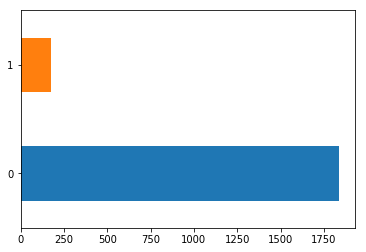

In [18]:
df["bad"].value_counts().plot.barh()  # 0 ve 1'lerin sayisinin bar plotunu cizdirelim.

In [23]:
# dummie'lerin alinmasi
df_dummy = pd.get_dummies(df[['reason','job']])
df_dummy

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0
158,0,1,1,0,0,0,0,0
159,1,0,1,0,0,0,0,0
160,1,0,1,0,0,0,0,0
161,1,0,1,0,0,0,0,0
162,1,0,1,0,0,0,0,0


In [24]:
df.columns

Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

In [26]:
df = df.drop(['reason','job'],axis=1)

In [28]:
df= pd.concat([df,df_dummy],axis=1)

In [31]:
df.head() # kategorik degiskenler numerige cevrildi.

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [41]:
Y = df.iloc[:,0:1]
X = df.iloc[:,1:]
print(X.columns)
print('################')
print(Y.columns)

Index(['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq',
       'clno', 'debtinc', 'reason_DebtCon', 'reason_HomeImp', 'job_Mgr',
       'job_Office', 'job_Other', 'job_ProfEx', 'job_Sales', 'job_Self'],
      dtype='object')
################
Index(['bad'], dtype='object')


In [42]:

# stats models logistic regression with all variables
lr = sm.Logit(Y, X)
lr_model = lr.fit()
lr_model.summary()

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Sun, 22 Sep 2019   Pseudo R-squ.:                  0.2346
Time:                        11:15:09   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938   1.26e+07  -3.02e-07      1.000   -2.46e+07    2.46e+07
reason_HomeImp    -3.8593   1.26e+07  -3.07e-07      1.000   -2.46e+07    2.46e+07
job_Mgr           -1.4722   1.26e+07  -1.17e-07      1.000   -2.46e+07    2.46e+07
job_Office        -2.0716   1.26e+07  -1.65e-07      1.000   -2.46e+07    2.46e+07
job_Other         -1.5260   1.26e+07  -1.22e-07      1.000   -2.46e+07    2.46e+07
job_ProfEx        -1.5377   1.26e+07  -1.22e-07      1.000   -2.46e+07    2.46e+07
job_Sales         -0.2487   1.26e+07  -1.98e-08      1.000   -2.46e+07    2.46e+07
job_Self          -0.7970   1.26e+07  -6.35e-08      1.000   -2.46e+07    2.46e+07
==================================================================================
"""

In [63]:
# Simdi p value'su > 0.05 olanlari modelden cikaralim ve oyle log. reg. kuralim

for col in X.columns:
    if(lr_model.pvalues[col]>0.05):
        X.drop([col],axis=1,inplace=True)
        print(col)
        



In [64]:
X.columns

Index(['derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'], dtype='object')

In [65]:
# Verilerimizi train ve test olarak ayiralim

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)


In [66]:
X_train.shape

(1614, 6)

In [67]:
y_train.shape

(1614, 1)

In [69]:
# sklearn logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
lr_model = lr.fit(X_train,y_train)

C:\Users\melih\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
y_pred = lr.predict(X_test)

In [72]:
# confusion matrix ve accuracy

conf_mtx = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Counfusion matrix: \n",conf_mtx)
print("Accuracy: ",accuracy)


Counfusion matrix: 
 [[368   1]
 [ 31   4]]
Accuracy:  0.9207920792079208


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       0.80      0.11      0.20        35

   micro avg       0.92      0.92      0.92       404
   macro avg       0.86      0.56      0.58       404
weighted avg       0.91      0.92      0.89       404



0.5557878435927216
$$$$$$$$$$$$$$$$$$$$$
fpr:  [0.         0.         0.         0.00271003 0.00271003 0.00542005
 0.00542005 0.01355014 0.01355014 0.01626016]
tpr:  [0.         0.02857143 0.08571429 0.08571429 0.25714286 0.25714286
 0.28571429 0.28571429 0.31428571 0.31428571]
thresholds:  [1.97638804 0.97638804 0.74837224 0.65461102 0.37716893 0.34659559
 0.34315243 0.30409316 0.2939547  0.28121134]


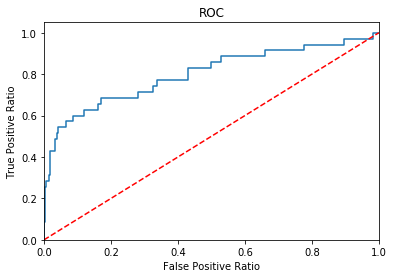

In [79]:
# Roc Curve'un Cizdirilmesi

lr_roc_auc = roc_auc_score(y_test,y_pred)
print(lr_roc_auc) # 1'e ne kadar yakin o kadar iyi
print('$$$$$$$$$$$$$$$$$$$$$')
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
print("fpr: ",fpr[0:10])
print("tpr: ",tpr[0:10])
print("thresholds: ",thresholds[0:10])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % lr_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC')
plt.show()